## Estimation of Obesity levels: 
The estimation of obesity levels in individuals from the countries of Mexico, Peru, and Colombia, based on their eating habits and physical condition.


Data Source: https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Tasks to be performed: 
- Descriptive analysis, 
- correlation studies,  
- linear regression analysis, 
- finding important variables using statistical tests 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


|**Category**|**Attribute**              | **Description**                       |**Type**   |
|-----------------|-----------------------------------|--------------------------------------------------------|---------------|
| Target          | NObeyesdad                        | Under/Normal/Over weight    |
| General         | Gender                            | Male/Female                                            | Categorical   |
| General         | Age                               | in years                                               | Integer       |
| General         | Height                            | in meters                                              | Float         |
| General         | Weight                            | in kilograms                                           | Float         |
| General         | family\_history\_with\_overweight | Family overweight history Y/N                          | Categorical   |
| Consumption     | FAVC                              | Frequency of consumption of high calorie food| Categorical |
| Consumption     | FCVC                              | Frequency of consumption of vegetables | Categorical |
| Consumption     | NCP                               | Number of main meals                                   | Ordinal       |
| Consumption     | CAEC                              | Consumption of food between meals| Ordinal
| Consumption     | SMOKE                              | Consumption of cigarette        | Categorical
| Consumption     | CH20                              | Consumption of water daily                             | Ordinal       |
| Consumption     | CALC                              | Consumption of alcohol                                 | Ordinal       |
| Physical Health | SCC                               | Calories consumption monitor                           | Categorical   |
| Physical Health | FAF                               | Physical activity frequency                            | Ordinal       |
| Physical Health | TUE                               | Time using technology device                           | Ordinal       |
| Physical Health | MTRANS                            | Transportation used                                    | Categorical   |


In [4]:
df.rename(columns = {'family_history_with_overweight':'family_hist'}, inplace = True)

## *Descriptive Statistics*

A. Measure of Variability

1. Mean
    - Average of the data

2. Geometric Mean
    - Average value or mean which signifies the central tendency of the set of numbers by finding product of their values. It is the nth root of the product of n numbers.
    
3. Harmonic Mean
    - Reciprocal of the average of the reciprocals of the data values. It gives large weightage to small values and less weightage to large values.
    
4. Mode
    - Most frequently occuring data/element. Mode can be none, one or more.
    
5. Median
    - 50%th precentile of the data or center point of the data.
    
B. Measure of Variability/Dispersion

1. Variance
    - Measure of how far the data are from tne mean. It is the calculation of spread or dispersion. 

2. Standard Deviation
    - Squared root of the dispersion.
    
C. Shape of data

1. Symmetric 
    - Measure of the symmetricity of the data. Checks whether the mean and median are close together or not.

2. Skewness
    - Measure of asymmetricity of the distribution of the data. 
    - Positive Skewness
        - When the data is skewed towards left or right tailed i.e. Mean > Median.
    - Negative Skewness
        - When the data is skewed towards right or left tailed i.e. Mean < Median.
        
3. Kurtosis
    - Measure of extent to which a distribution contains outliers. Propensity of the distribution to have extreme values within its tails is described.
    - Platykurtic: Light tailed, lesser kurtosis than normal distribution i.e lighter tails containing fewer outliers
    - Mesokurtic: Widely distributed i.e matches normal distribution.
    - Leptokurtic: Heavy tailed, higher kurtosis than normal distribution. i.e longer tails containing more outliers. 

In [5]:
df.mean()

Age       24.312600
Height     1.701677
Weight    86.586058
FCVC       2.419043
NCP        2.685628
CH2O       2.008011
FAF        1.010298
TUE        0.657866
dtype: float64

In [6]:
from scipy.stats import gmean, hmean

print('Mean: ' , df['Age'].mean())
print('Geometric Mean: ' , gmean(df['Age']))
print('Harmonic Mean: ' , hmean(df["Age"]))
print('Mode: ' , df['Age'].mode()[0])
print('Median: ', df['Age'].median())

Mean:  24.31259990857412
Geometric Mean:  23.61419173159334
Harmonic Mean:  23.01996123700157
Mode:  18.0
Median:  22.77789


In [7]:
print('Variance: ' , df['Age'].var())
print('Standard Deviation: ' , df['Age'].std())

Variance:  40.27131333121615
Standard Deviation:  6.3459682737322405


In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.skew()

Age       1.529100
Height   -0.012855
Weight    0.255410
FCVC     -0.432906
NCP      -1.107097
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64

In [10]:
df.kurt()

Age       2.826389
Height   -0.562949
Weight   -0.699898
FCVC     -0.637546
NCP       0.385527
CH2O     -0.879395
FAF      -0.620588
TUE      -0.548660
dtype: float64

In [11]:
df['Height'].quantile(.75)

1.768464

In [12]:
numeric_cols =  df[df.describe().columns].columns
for col in numeric_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %.3f' %(col, IQR)) 

IQR of Age : 6.053
IQR of Height : 0.138
IQR of Weight : 41.957
IQR of FCVC : 1.000
IQR of NCP : 0.341
IQR of CH2O : 0.893
IQR of FAF : 1.542
IQR of TUE : 1.000


In [13]:
for col in numeric_cols:
    range_of_values = df[col].max() - df[col].min()
    print('range of %s : %.3f' %(col,range_of_values))

range of Age : 47.000
range of Height : 0.530
range of Weight : 134.000
range of FCVC : 2.000
range of NCP : 3.000
range of CH2O : 2.000
range of FAF : 3.000
range of TUE : 2.000


# Inferential Statistics

### Confidence Interval

<AxesSubplot:xlabel='Weight', ylabel='Height'>

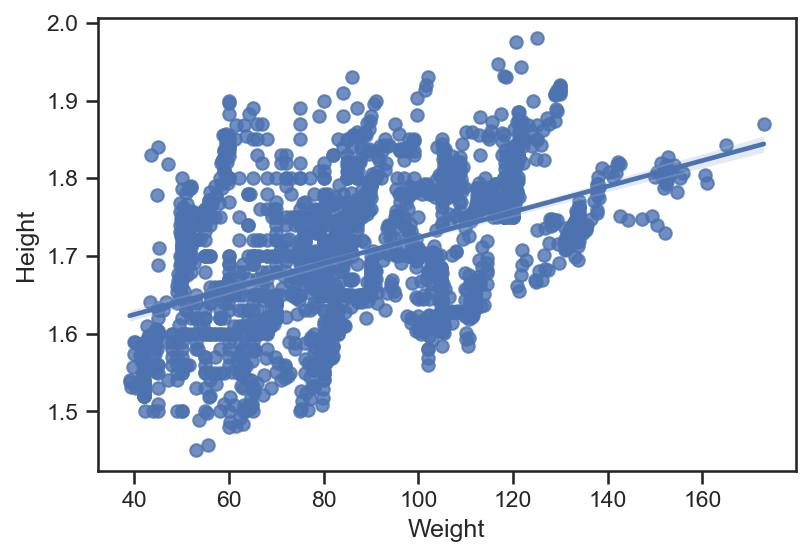

In [14]:
sns.regplot(data = df, x="Weight", y="Height", ci=95)

The confidence interval is wide.

In [15]:
#In-built function to calculate C.I
import statsmodels.api as sm
print("Confidence Interval: (%.2f, %.2f)" %sm.stats.DescrStatsW(df['Age']).zconfint_mean())

Confidence Interval: (24.04, 24.58)


<AxesSubplot:xlabel='Age', ylabel='Count'>

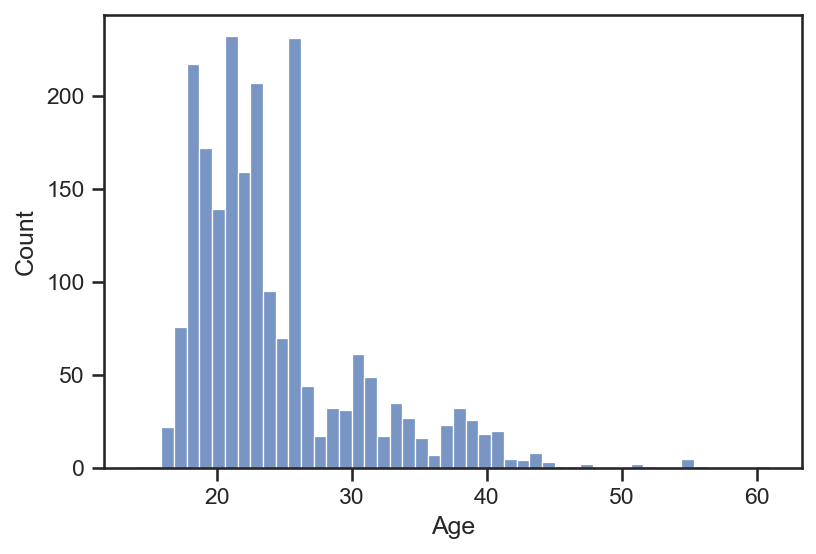

In [16]:
sns.histplot(df['Age'])

## Pandas Profiling

In [17]:
profile = ProfileReport(df, title="Pandas Profiling Report", infer_dtypes=False)
# profile.to_file("obesity_report.html")

### Duplicated Rows

In [18]:
len(df[df.duplicated()])

24

There are 24 duplicated entries.

## Statistics of Categorical and Numerical Data

In [19]:
round (df.describe(exclude = ['object']), 2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [20]:
round (df.describe(exclude = ['float', 'int64']),2)

,Gender,family_hist,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


## Correlation Analysis

Text(0.5, 1.0, 'Correlation heatmap of features')

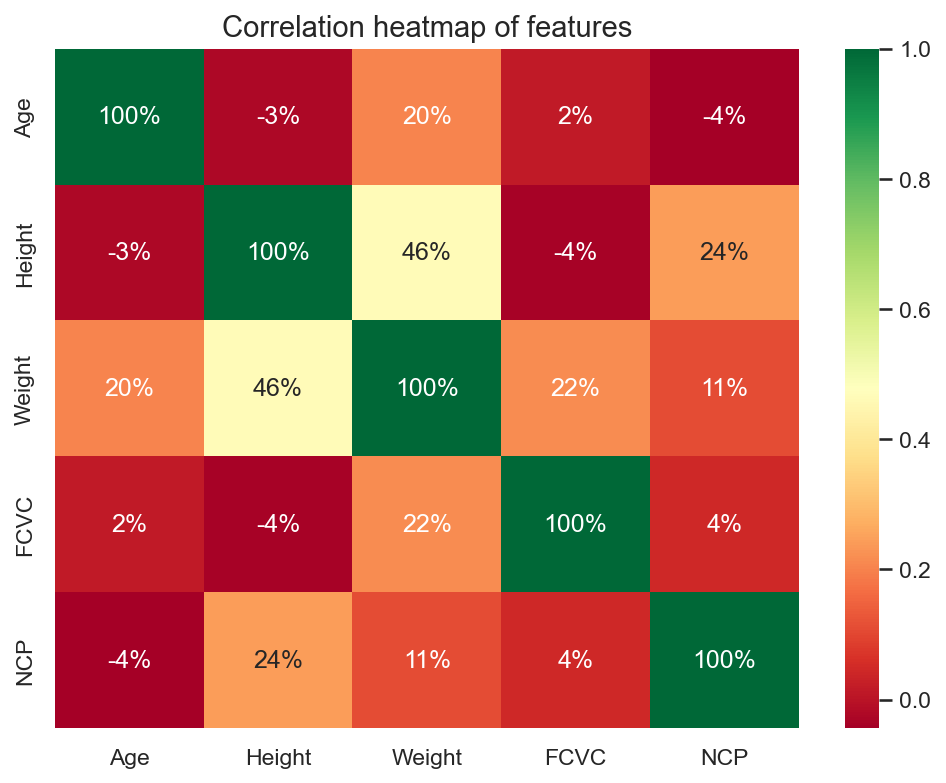

In [21]:
plt.figure(figsize=(8,6))
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
sns.heatmap(df.iloc[:,0:9].corr(), annot=True, cmap='RdYlGn', fmt='.0%')
plt.title("Correlation heatmap of features", fontsize = 14)

## Distribution of Targets

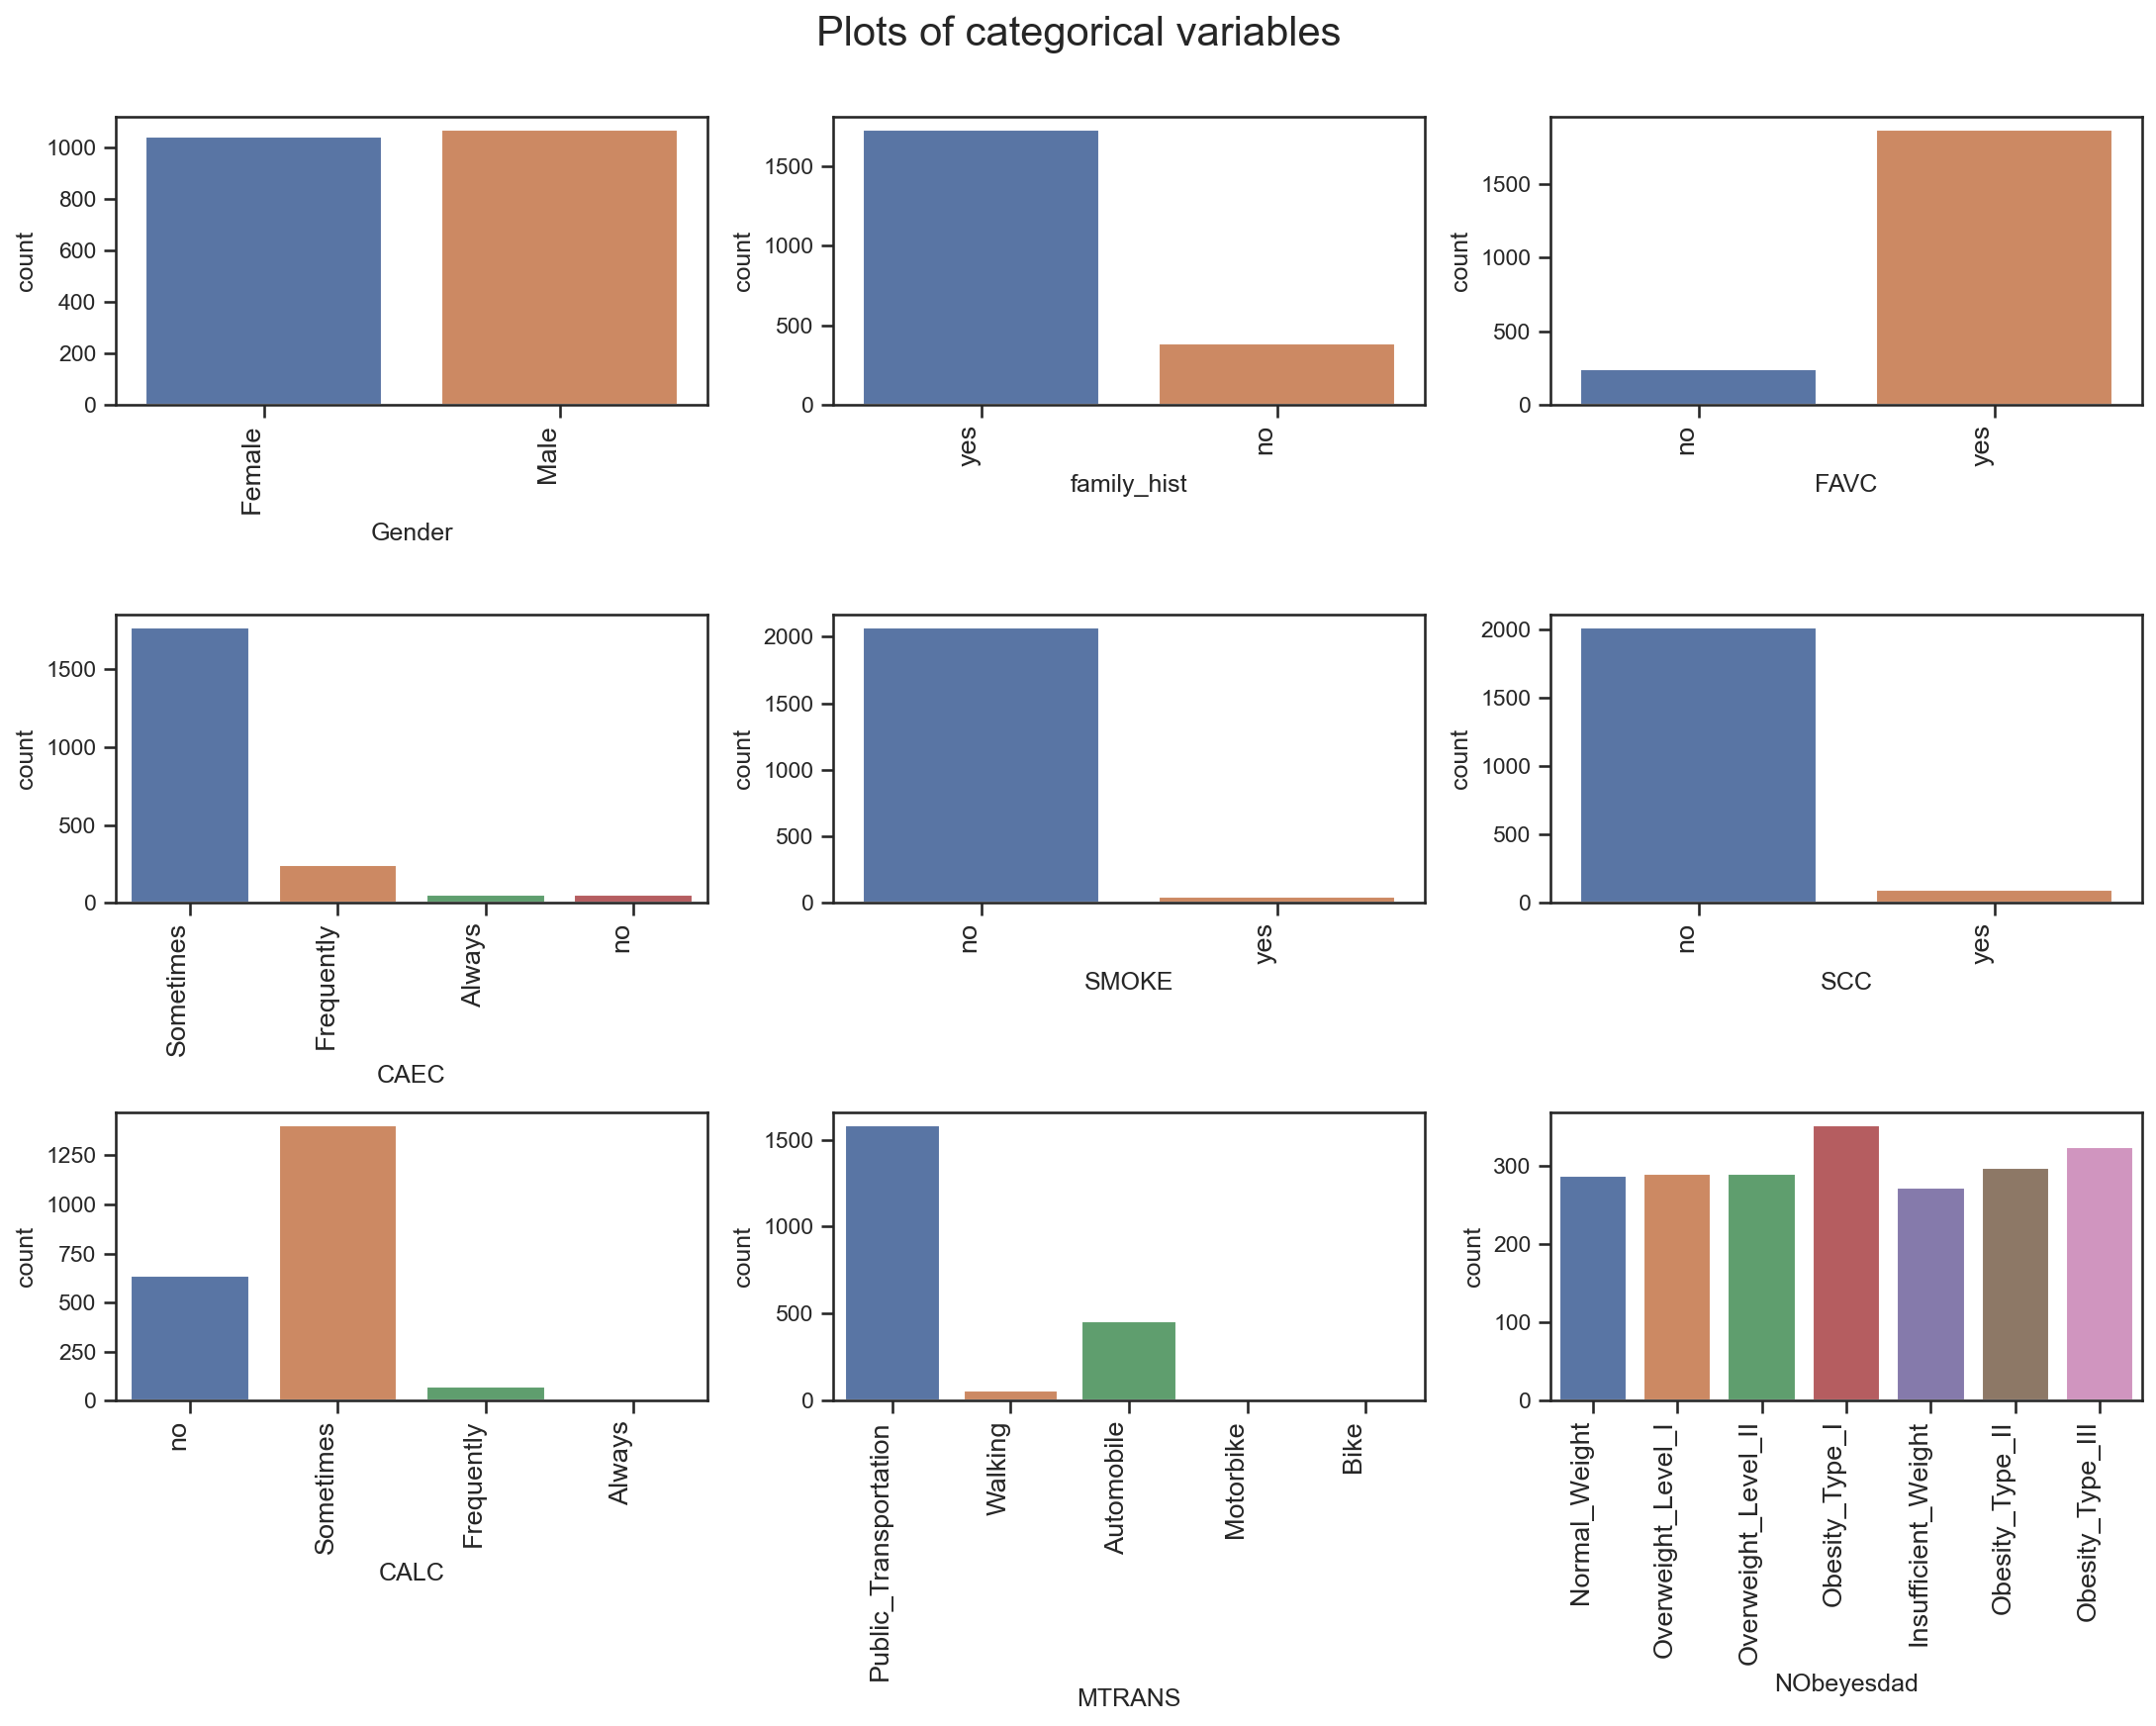

In [22]:
# columns of interest
cat_columns = ['Gender', 'family_hist', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 12))
for col, subplot in zip(cat_columns, ax.flatten()):
#     sns.countplot(df[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(subplot.get_xticklabels(),rotation=90,fontsize=13, horizontalalignment='right') #, labels=df.MTRANS)        
#         subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(subplot.get_xticklabels(),rotation=90,fontsize=13, horizontalalignment='right') #, labels=df.NObeyesdad)  
#         ax.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(subplot.get_xticklabels(),rotation=90,fontsize=13, horizontalalignment='right') #, labels=df.NObeyesdad)  
#         ax.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Plots of categorical variables", fontsize=20)
plt.tight_layout(pad=2, w_pad=1.0, h_pad=1)
plt.show()

## Age Distribution

In [23]:
np.sort(df.Age.unique())

array([14.     , 15.     , 16.     , ..., 55.24625, 56.     , 61.     ])

(array([317., 909., 457., 190., 108., 101.,  17.,   4.,   7.,   1.]),
 array([14. , 18.7, 23.4, 28.1, 32.8, 37.5, 42.2, 46.9, 51.6, 56.3, 61. ]),
 <BarContainer object of 10 artists>)

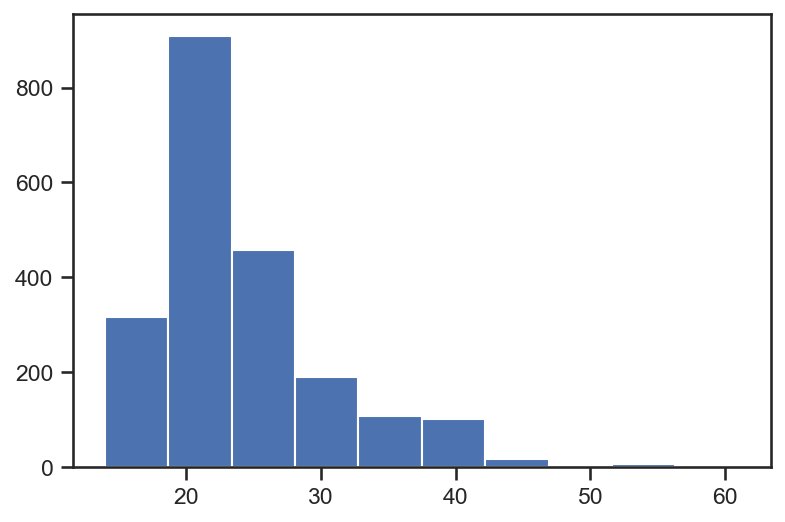

In [24]:
plt.hist(df.Age)

The survey is conducted on people of age 14 to 61

In [25]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if ( 14 < x < 20 ):
        return "Teens"
    if ( 20 < x < 25 ):
        return "20-25"
    if ( 25 < x < 30 ):
        return "25-30"
    if ( 30 < x < 35 ):
        return "30-35"
    if ( 35 < x < 40 ):
        return "35-40"
    if ( 40 < x < 45 ):
        return "40-45"
    if ( 45 < x < 50 ):
        return "45-50"
    else:
        return "50s+"

df['age_cat10yrs'] = df['Age'].apply(age_group)

In [26]:
df['age_cat10yrs'].value_counts()

20-25    679
Teens    536
50s+     410
25-30    235
30-35    128
35-40     96
40-45     24
45-50      3
Name: age_cat10yrs, dtype: int64

In [27]:
my_order = ['Insufficient_Weight', 'Normal_Weight', 
            'Overweight_Level_I', 'Overweight_Level_II',
            'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III']
df['Obese'] = df['NObeyesdad'].astype('category').cat.reorder_categories(my_order)

In [28]:
df['NObeyesdad'].dtypes

dtype('O')

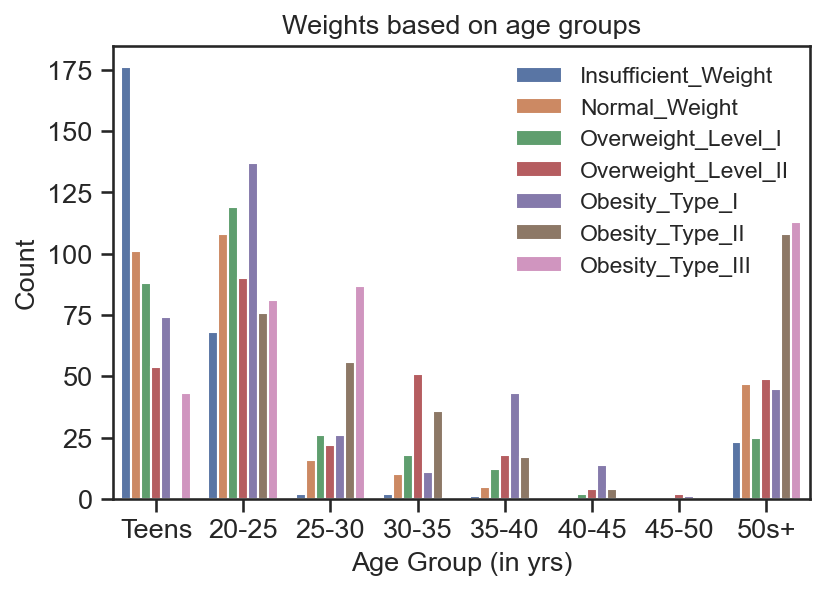

In [29]:
# order_list = ['Teens','20s', '30s', '40s', '50s and above']
order_list = ['Teens','20-25', '25-30','30-35','35-40','40-45','45-50', '50s+']
sns.countplot(df['age_cat10yrs'], hue = df['Obese'], order = order_list)
plt.title('Weights based on age groups', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Group (in yrs)', size=13)
plt.ylabel('Count', size=13)
plt.legend(loc="upper right",fontsize=11, frameon=False)

In [30]:
def age_group1(x):
    x = int(x)
    x = abs(x)
    if ( 14 < x < 20 ):
        return "Teens"
    if ( 20 < x < 30 ):
        return "20s"
    if ( 30 < x < 40 ):
        return "30s"
    if ( 40 < x < 50 ):
        return "40s"
    else:
        return "50s+"

df['age_cat'] = df['Age'].apply(age_group1)

Text(0, 0.5, 'Proportion of population')

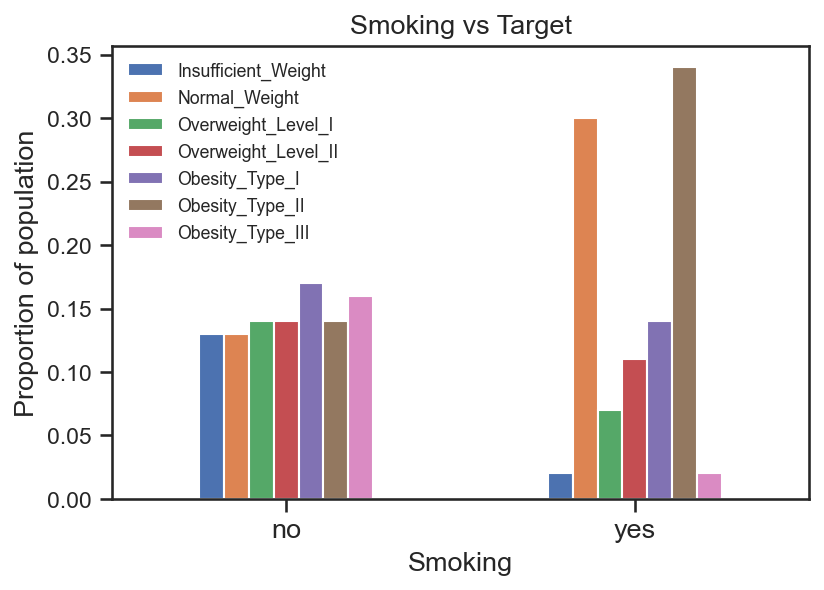

In [31]:
smoke = round(pd.crosstab(df.SMOKE, df.Obese).div(pd.crosstab(df.SMOKE, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = smoke.plot(kind ='bar')
plt.title( 'Smoking vs Target', fontsize=13)
plt.legend(loc="upper left",fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Smoking', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

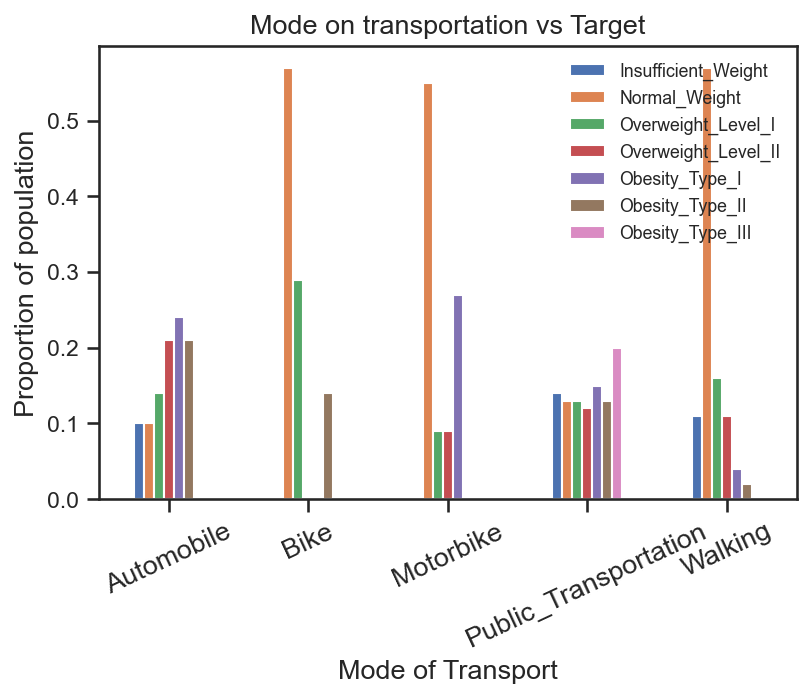

In [32]:
mtrans = round(pd.crosstab(df.MTRANS, df.Obese).div(pd.crosstab(df.MTRANS, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'Mode on transportation vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=25, fontsize=13)
ax.set_xlabel('Mode of Transport', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

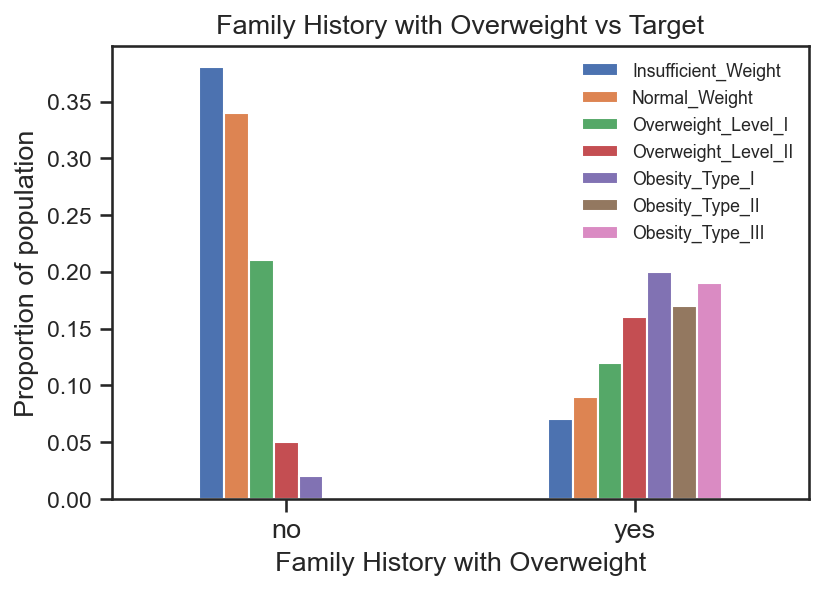

In [33]:
mtrans = round(pd.crosstab(df.family_hist, df.Obese).div(pd.crosstab(df.family_hist, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'Family History with Overweight vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Family History with Overweight', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

In [34]:
df['FAF']

0       0.000000
1       3.000000
2       2.000000
3       2.000000
4       0.000000
          ...   
2106    1.676269
2107    1.341390
2108    1.414209
2109    1.139107
2110    1.026452
Name: FAF, Length: 2111, dtype: float64

Text(0, 0.5, 'Proportion of population')

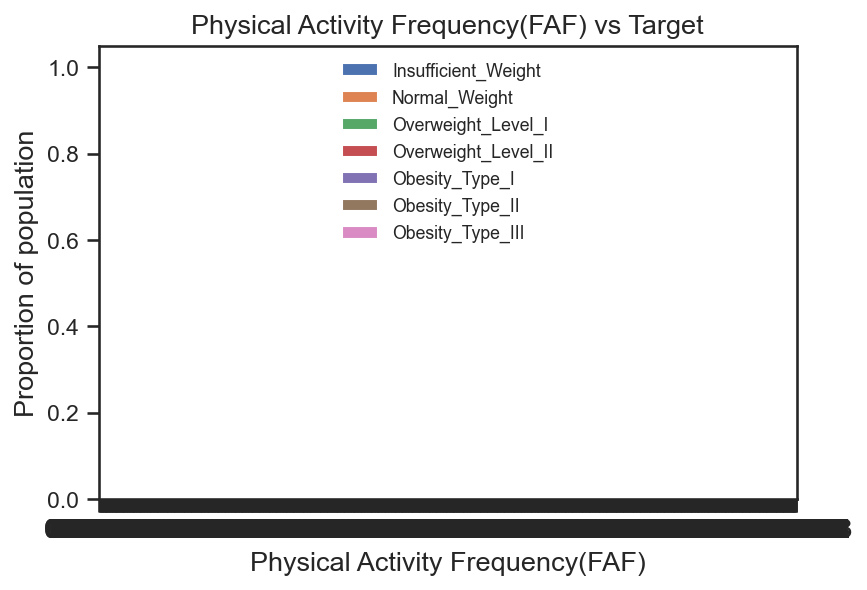

In [35]:
faf = round(pd.crosstab(df.FAF, df.Obese).div(pd.crosstab(df.FAF, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = faf.plot(kind ='bar')
plt.title( 'Physical Activity Frequency(FAF) vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Physical Activity Frequency(FAF)', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

## Round off ordinal variables

In [36]:
df['FCVC']= df['FCVC'].round(decimals = 0)
df['NCP']= df['NCP'].round(decimals = 0)
df['CH2O']= df['CH2O'].round(decimals = 0)
df['FAF']= df['FAF'].round(decimals = 0)
df['TUE']= df['TUE'].round(decimals = 0)

In [37]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_hist', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad', 'age_cat10yrs', 'Obese', 'age_cat'],
      dtype='object')

Text(0, 0.5, 'Proportion of population')

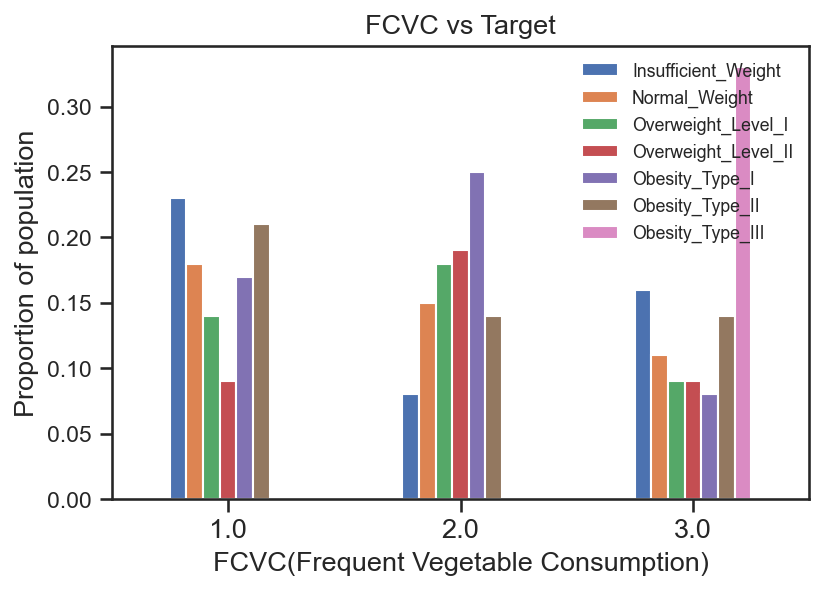

In [38]:
mtrans = round(pd.crosstab(df.FCVC, df.Obese).div(pd.crosstab(df.FCVC, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'FCVC vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('FCVC(Frequent Vegetable Consumption)', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

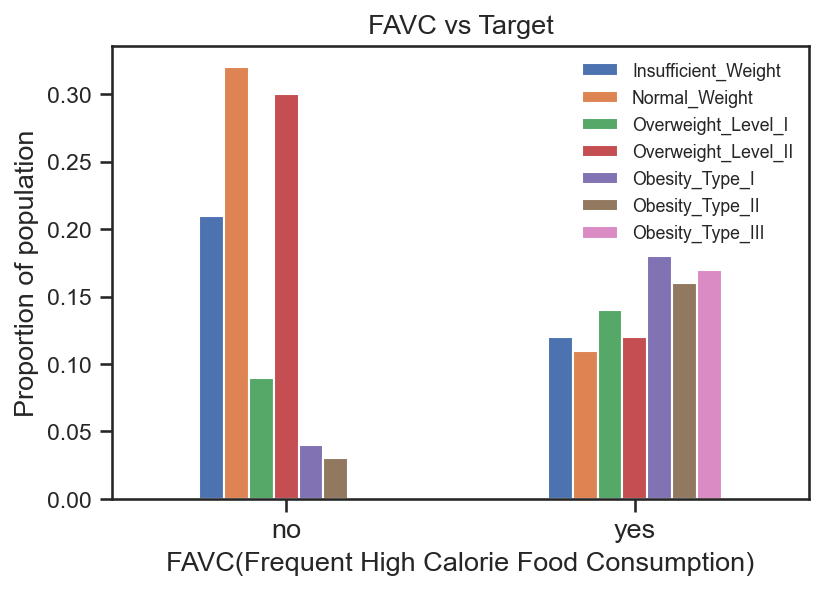

In [39]:
mtrans = round(pd.crosstab(df.FAVC, df.Obese).div(pd.crosstab(df.FAVC, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'FAVC vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('FAVC(Frequent High Calorie Food Consumption)', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

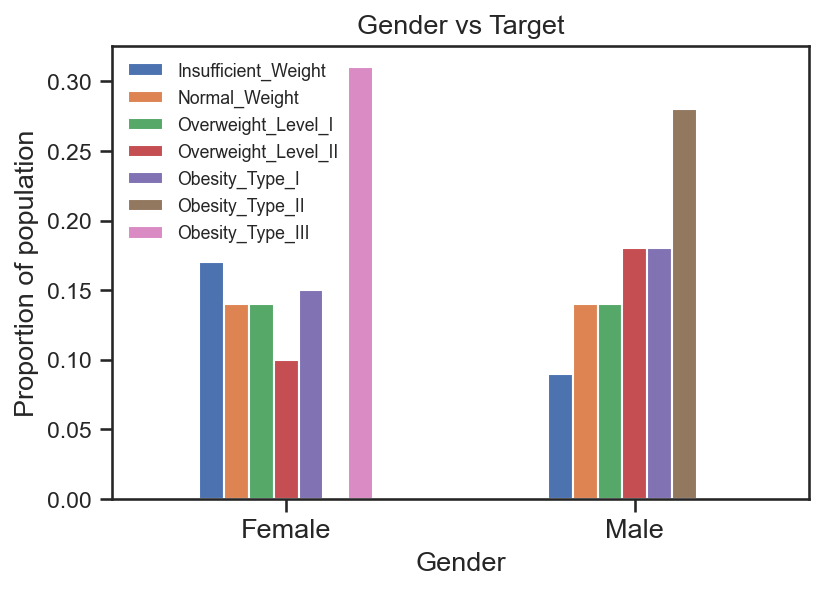

In [40]:
mtrans = round(pd.crosstab(df.Gender, df.Obese).div(pd.crosstab(df.Gender, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'Gender vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Gender', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

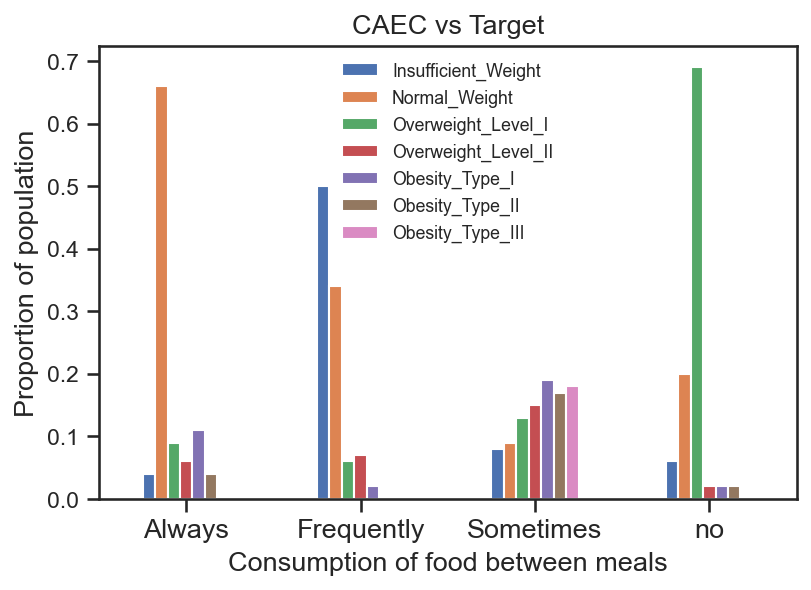

In [41]:
mtrans = round(pd.crosstab(df.CAEC, df.Obese).div(pd.crosstab(df.CAEC, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'CAEC vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Consumption of food between meals', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

In [42]:
df['FAF'].value_counts()

1.0    776
0.0    720
2.0    496
3.0    119
Name: FAF, dtype: int64

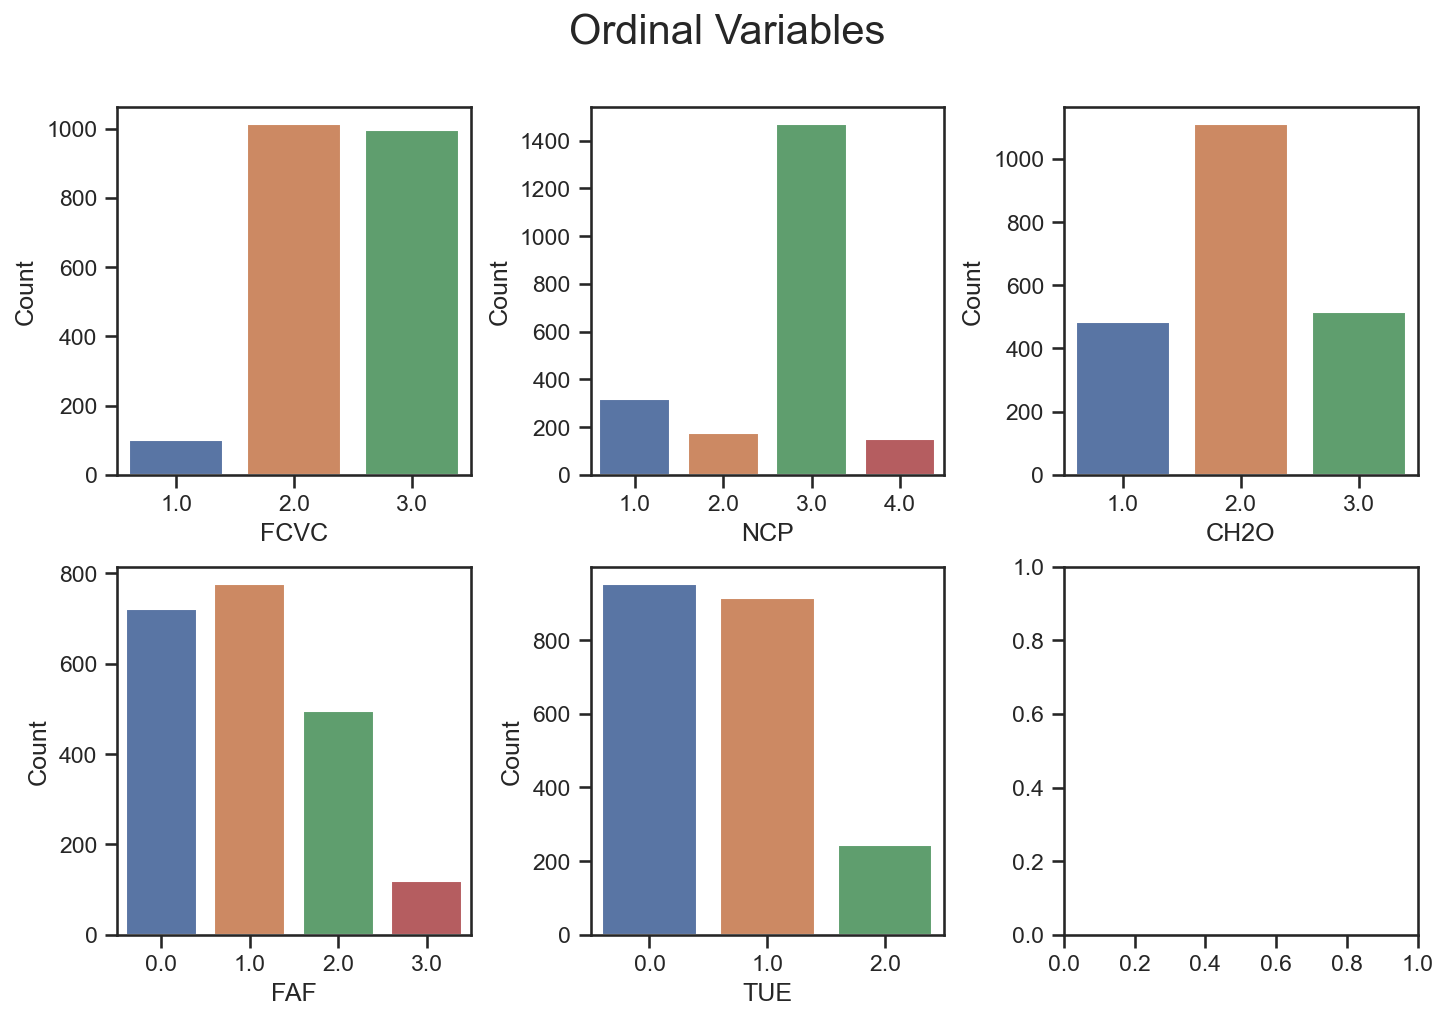

In [43]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(2, 3, figsize=(10, 7))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Count")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=1.5, w_pad=0.7, h_pad=0.5)
plt.show()

Text(0, 0.5, 'Proportion of population')

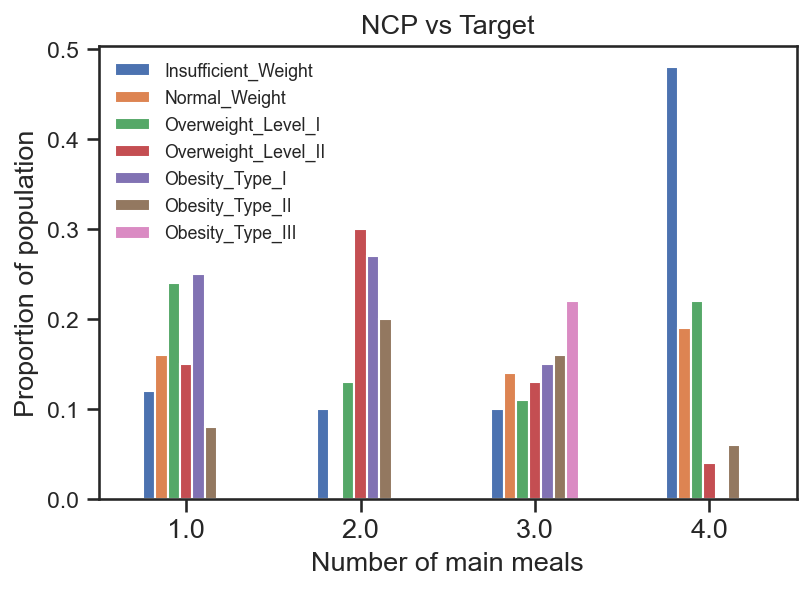

In [44]:
mtrans = round(pd.crosstab(df.NCP, df.Obese).div(pd.crosstab(df.NCP, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'NCP vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Number of main meals', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

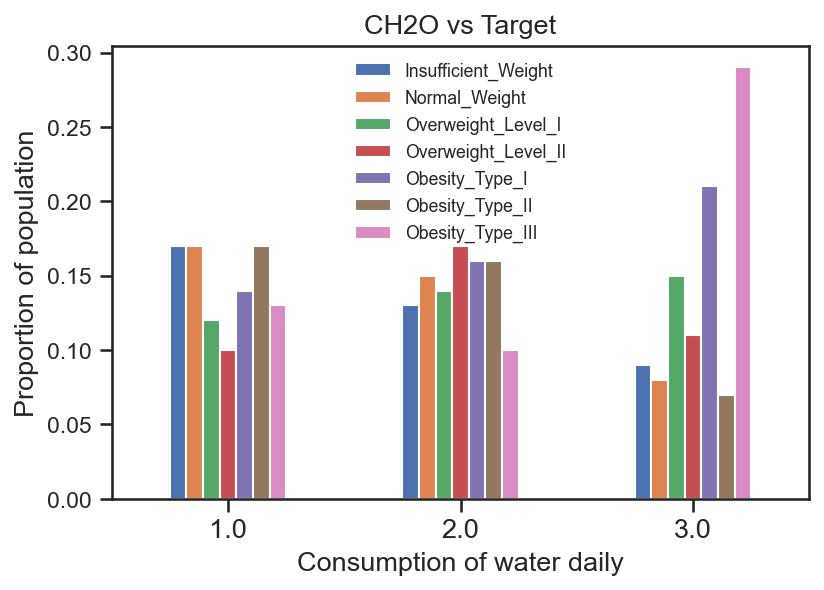

In [45]:
mtrans = round(pd.crosstab(df.CH2O, df.Obese).div(pd.crosstab(df.CH2O, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'CH2O vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Consumption of water daily', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

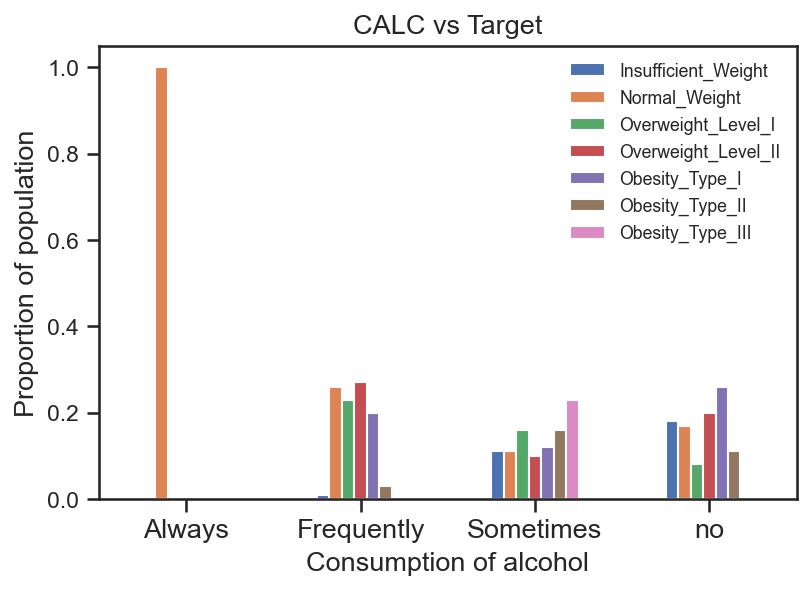

In [46]:
mtrans = round(pd.crosstab(df.CALC, df.Obese).div(pd.crosstab(df.CALC, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'CALC vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Consumption of alcohol', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

In [47]:
df[df['CALC']=='Always']['NObeyesdad'].value_counts()

Normal_Weight    1
Name: NObeyesdad, dtype: int64

Text(0, 0.5, 'Proportion of population')

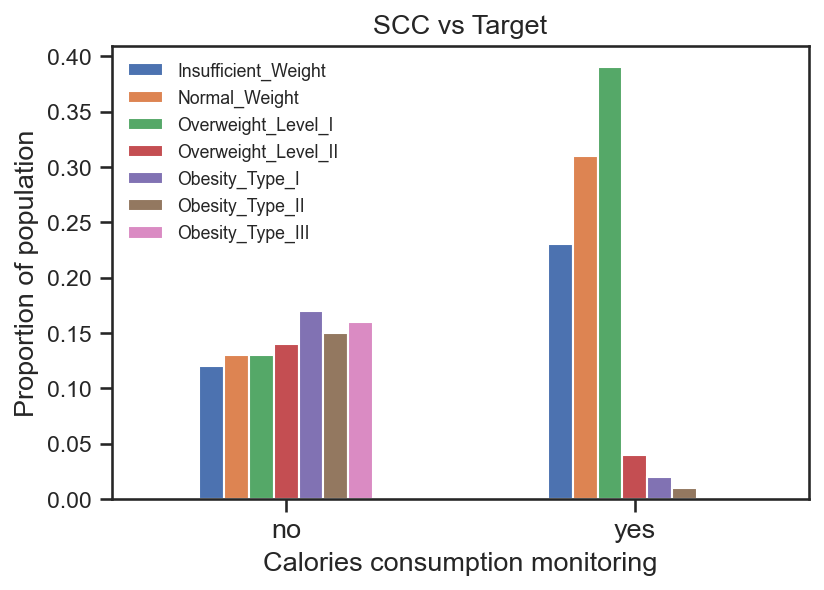

In [48]:
mtrans = round(pd.crosstab(df.SCC, df.Obese).div(pd.crosstab(df.SCC, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'SCC vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Calories consumption monitoring', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

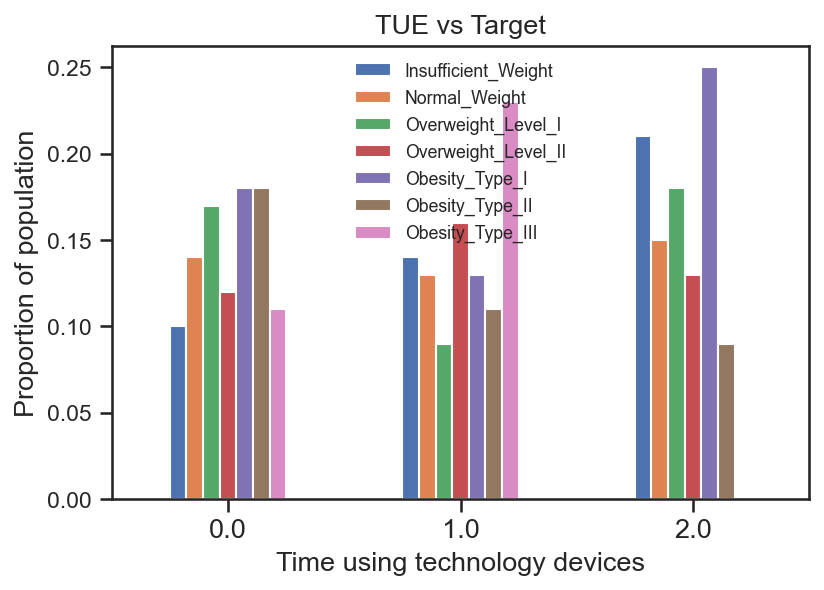

In [49]:
mtrans = round(pd.crosstab(df.TUE, df.Obese).div(pd.crosstab(df.TUE, df.Obese).apply(sum,1),0),2)
# gender.sort_values(by = 1, inplace = True)
ax = mtrans.plot(kind ='bar')
plt.title( 'TUE vs Target', fontsize=13)
plt.legend(fontsize=8.5, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Time using technology devices', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

In [50]:
df['Obese'].unique()

['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Text(0.5, 1.0, 'Distribution of Weight')

<Figure size 1500x1200 with 0 Axes>

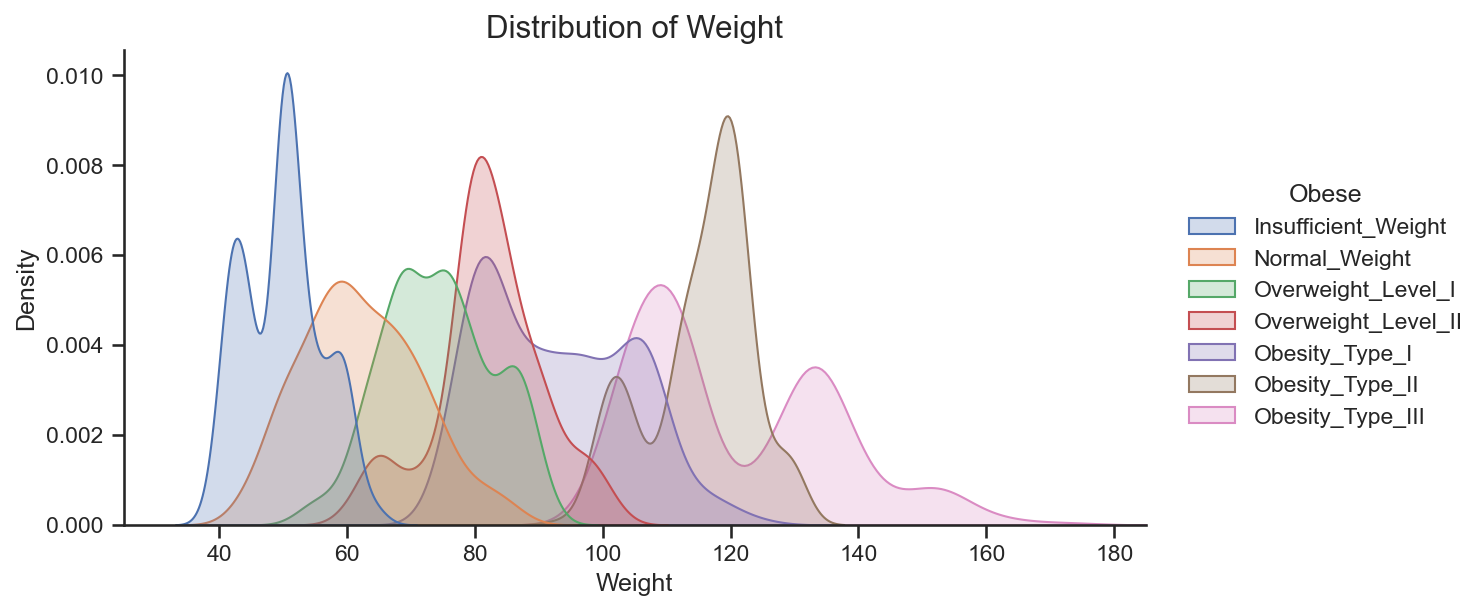

In [51]:
plt.figure(figsize=[10, 8])
sns.displot(df, x="Weight", height=4, aspect=2, hue="Obese", kind="kde", fill=True,facet_kws={'xlim': (25, 185)})
plt.title("Distribution of Weight", fontsize = 15)

In [52]:
df['Height']

0       1.620000
1       1.520000
2       1.800000
3       1.800000
4       1.780000
          ...   
2106    1.710730
2107    1.748584
2108    1.752206
2109    1.739450
2110    1.738836
Name: Height, Length: 2111, dtype: float64

Text(0.5, 1.0, 'Distribution of Height')

<Figure size 1500x1200 with 0 Axes>

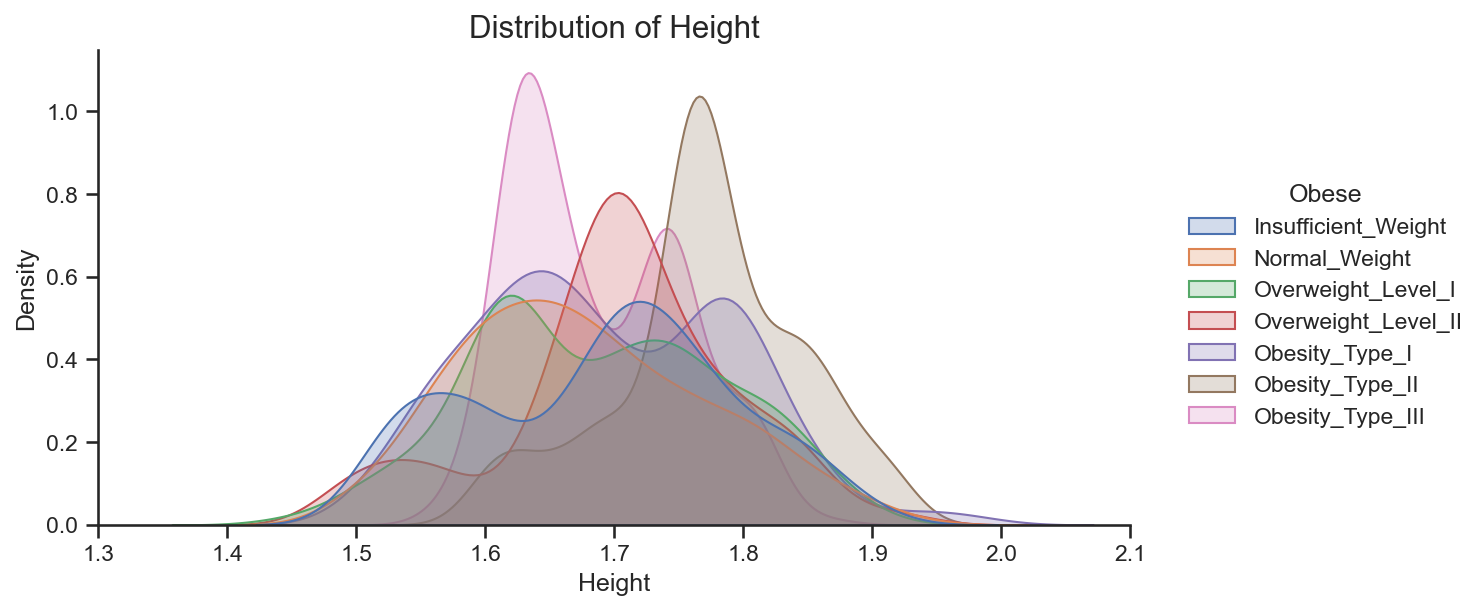

In [53]:
plt.figure(figsize=[10, 8])
sns.displot(df, x="Height", height=4, aspect=2, hue="Obese", kind="kde", fill=True,facet_kws={'xlim': (1.3,2.1)})
plt.title("Distribution of Height", fontsize = 15)

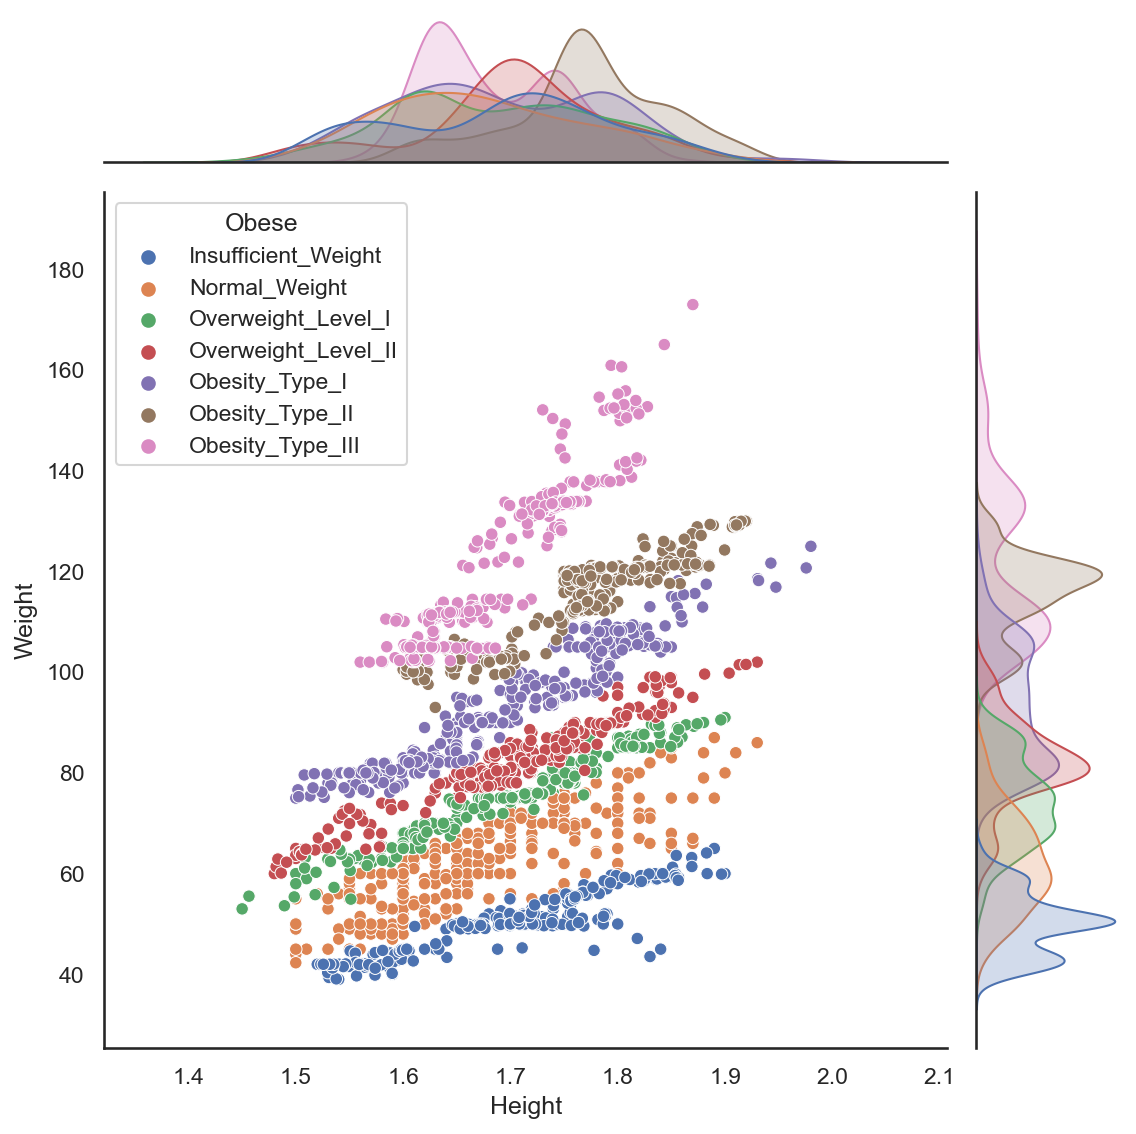

In [54]:
sns.set_style('white')
g = sns.jointplot(x='Height', y='Weight', hue='Obese', data=df)
g.fig.set_size_inches(8, 8)
g.set_axis_labels("Height", "Weight")
plt.show()

## Calculate BMI using height and weight

In [55]:
df['BMI'] = df['Weight']/(df['Height']**2)

## Target Value Distribution

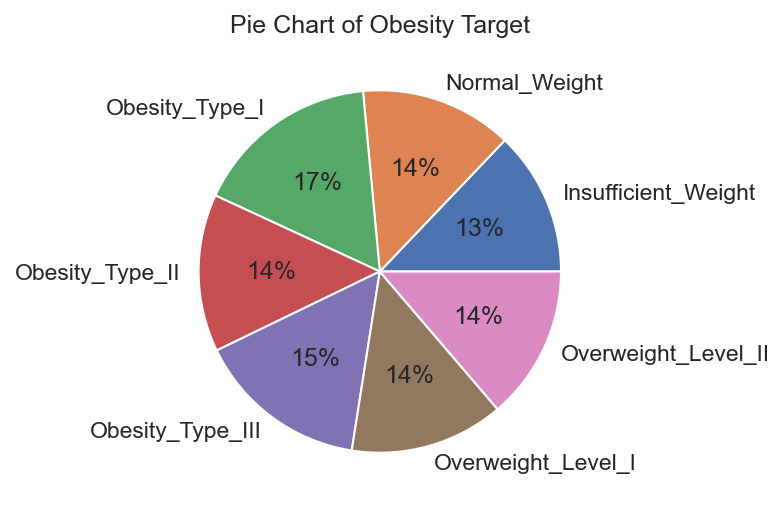

In [56]:
counts = df.groupby(['NObeyesdad'])['NObeyesdad'].count()

# Create pie chart of target value
plt.pie(counts.values, labels = counts.keys(), autopct='%.0f%%')
plt.title("Pie Chart of Obesity Target")
plt.show()

In [57]:
df.isna().sum()

Gender          0
Age             0
Height          0
Weight          0
family_hist     0
FAVC            0
FCVC            0
NCP             0
CAEC            0
SMOKE           0
CH2O            0
SCC             0
FAF             0
TUE             0
CALC            0
MTRANS          0
NObeyesdad      0
age_cat10yrs    0
Obese           0
age_cat         0
BMI             0
dtype: int64

In [58]:
# [df[colname].value_counts() for colname in df.columns]

Text(0.5, 1.0, 'BMI and Weight Category')

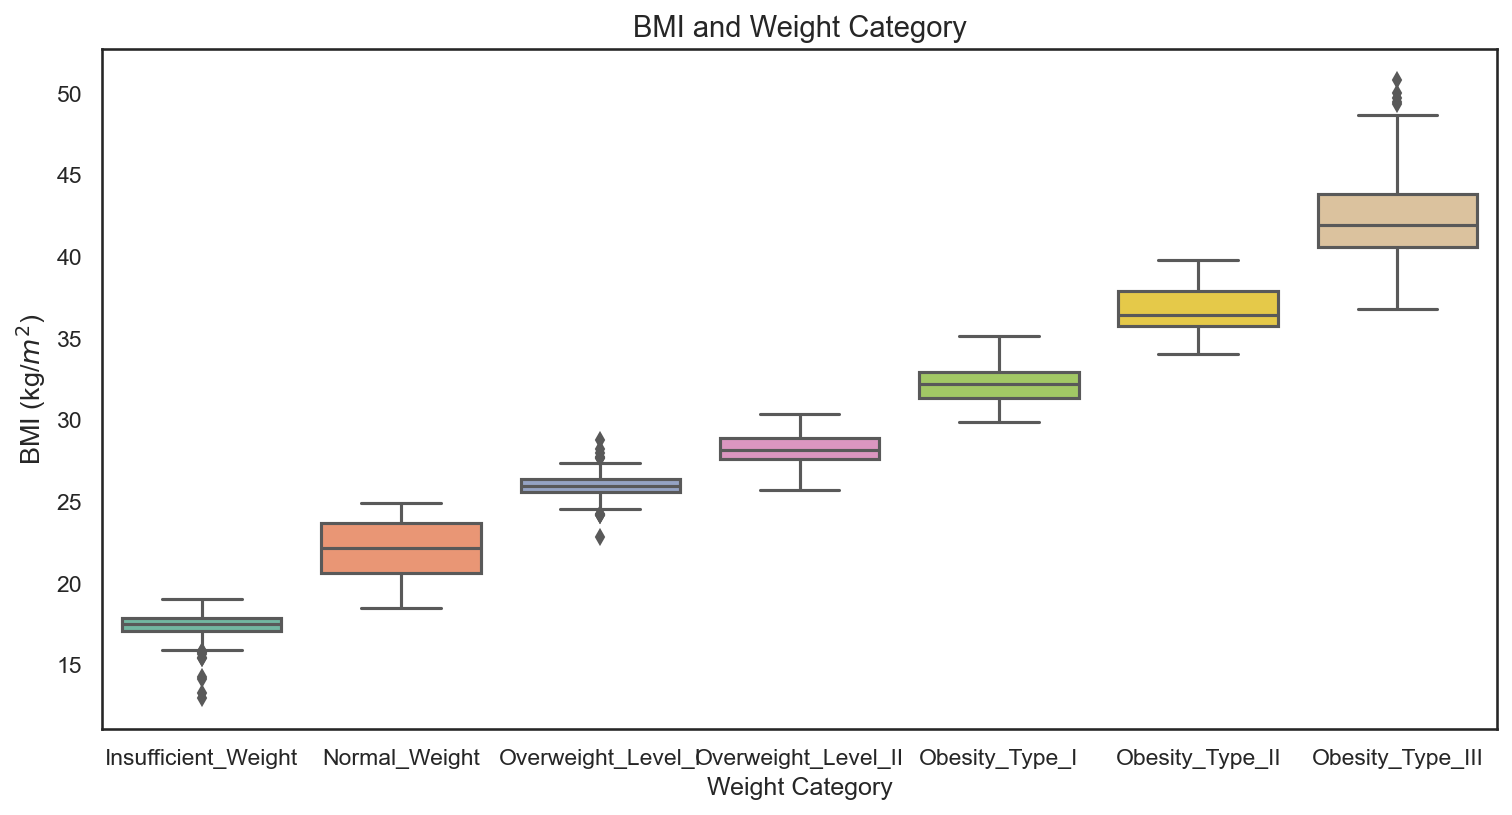

In [59]:
plt.figure(figsize=(12,6))
# fig, ax = plt.subplots()

sns.boxplot(x = 'Obese', y = 'BMI', 
           order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
           data = df, palette = "Set2")
# sns.regplot(x="Obese", y="BMI", data=df, scatter=False)
plt.ylabel("BMI (kg/$m^2$)", size=13)
plt.xlabel("Weight Category", size=12)
plt.title('BMI and Weight Category',size = 14)

In [60]:
df['age_cat']

0        20s
1        20s
2        20s
3        20s
4        20s
        ... 
2106    50s+
2107     20s
2108     20s
2109     20s
2110     20s
Name: age_cat, Length: 2111, dtype: object

In [61]:
df

,Gender,Age,Height,Weight,family_hist,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_cat10yrs,Obese,age_cat,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,25-30,Overweight_Level_I,20s,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20-25,Overweight_Level_II,20s,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,50s+,Obesity_Type_III,50s+,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,44.071535


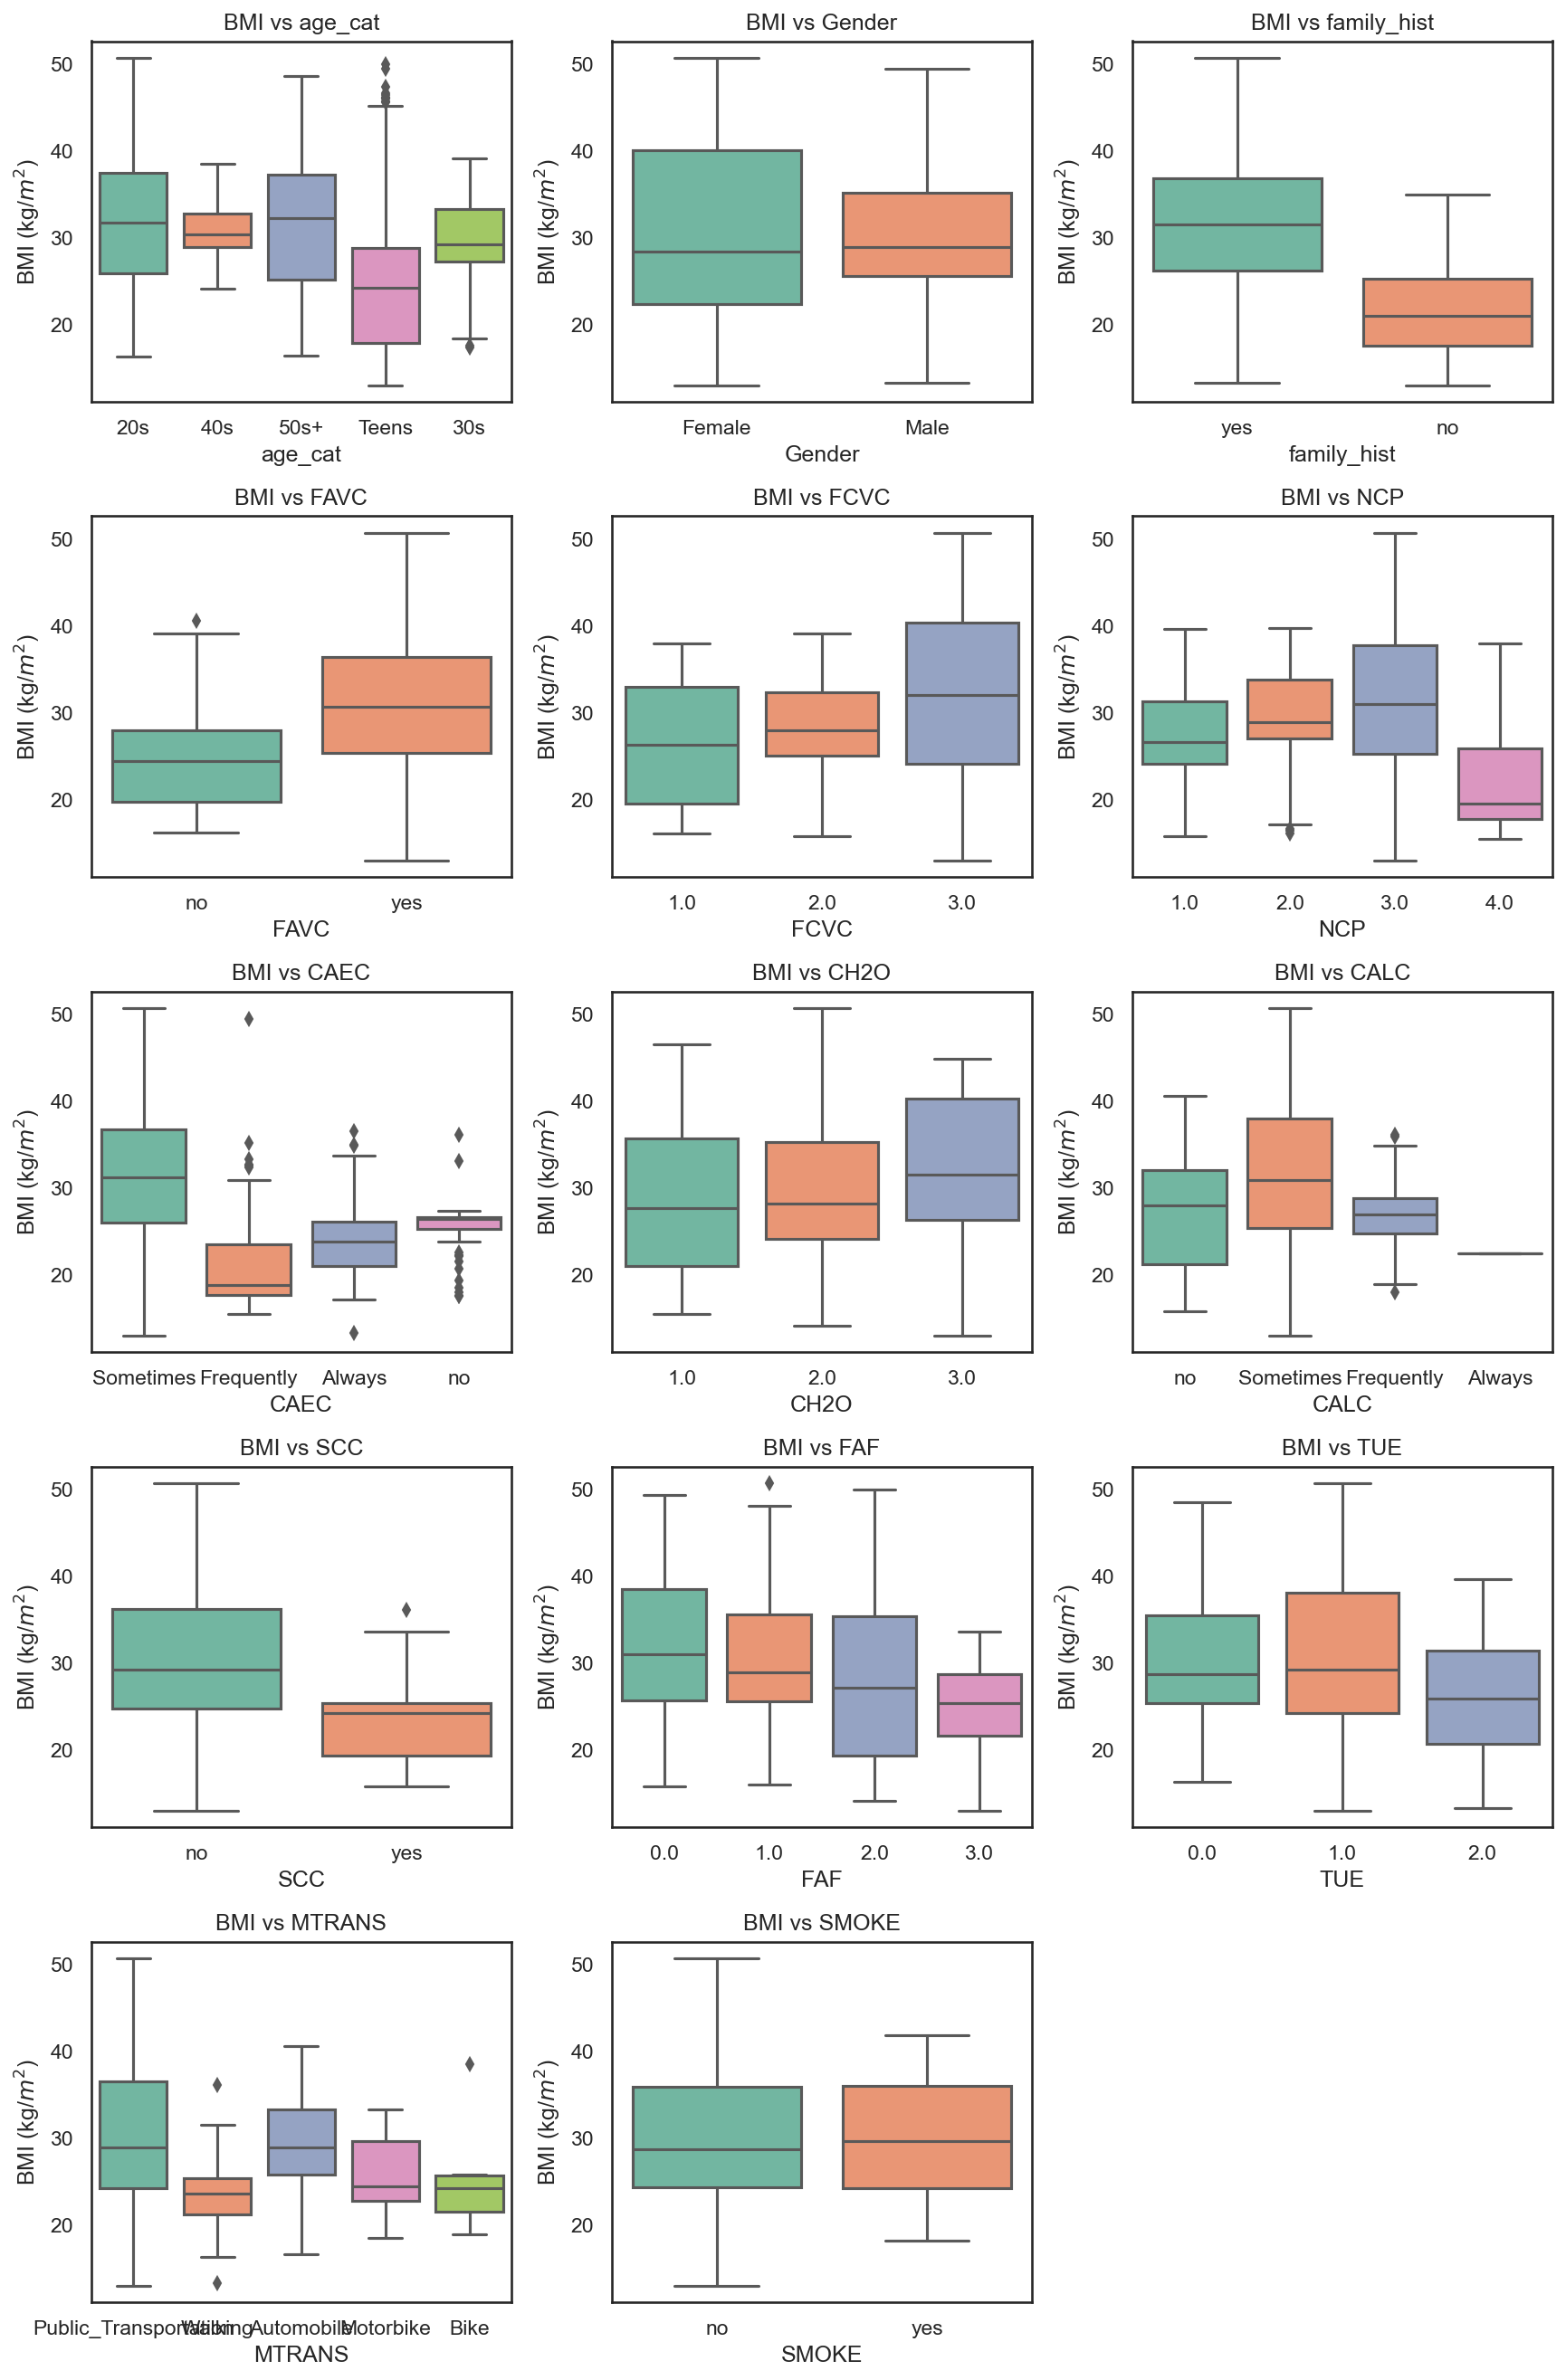

In [62]:
plt.figure(figsize=(12,18))
plots = ['age_cat','Gender','family_hist','FAVC','FCVC','NCP','CAEC','CH2O','CALC','SCC','FAF','TUE','MTRANS','SMOKE']
#subplot 1: high caloric food 
for i in range(0, 14):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = plots[i], y = 'BMI',data = df, palette = "Set2").set_title(f'BMI vs {str(plots[i])}')
    plt.xlabel(plots[i], size=12)
    plt.ylabel("BMI (kg/$m^2$)", size=12)

fig.suptitle("Plots of categorical variables", fontsize=20)
plt.tight_layout(pad=2, w_pad=1.0, h_pad=1)

# Statistical Tests

In [63]:
ALPHA = 0.05

### Z Score
    - How many std away are the data from the mean?

In [64]:
import scipy.stats as stats
z_scores = stats.zscore(df[numeric_cols])
z_scores

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.725454,0.385644,-0.021330,-1.124415,0.497717
1,-0.522124,-1.947599,-1.168077,0.987559,0.385644,1.431202,2.226606,-0.986295
2,-0.206889,1.054029,-0.366090,-0.725454,0.385644,-0.021330,1.109599,0.497717
3,0.423582,1.054029,0.015808,0.987559,0.385644,-0.021330,1.109599,-0.986295
4,-0.364507,0.839627,0.122740,-0.725454,-2.085053,-0.021330,-1.124415,-0.986295
...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,0.987559,0.385644,-0.021330,1.109599,0.497717
2107,-0.367195,0.502844,1.800914,0.987559,0.385644,-0.021330,-0.007408,0.497717
2108,-0.281909,0.541672,1.798868,0.987559,0.385644,-0.021330,-0.007408,0.497717
2109,0.007776,0.404927,1.785780,0.987559,0.385644,1.431202,-0.007408,0.497717


In [65]:
df

,Gender,Age,Height,Weight,family_hist,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_cat10yrs,Obese,age_cat,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,25-30,Overweight_Level_I,20s,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20-25,Overweight_Level_II,20s,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,50s+,Obesity_Type_III,50s+,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,44.071535


## 2 sample Z test

In [66]:
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

The number of male and female are comparable. We will now check if the means of the male and female population are equal using two sample Z test.

In [67]:
M_mean=df.loc[df['Gender']=='Male','Age'].mean()
F_mean=df.loc[df['Gender']=='Female','Age'].mean()
M_std=df.loc[df['Gender']=='Male','Age'].std()
F_std=df.loc[df['Gender']=='Female','Age'].std()
no_of_M=df.loc[df['Gender']=='Male','Age'].count()
no_of_F=df.loc[df['Gender']=='Female','Age'].count()

In [68]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    print(sd1)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - stats.norm.cdf(abs(z)))
    return round(z,3), pval
z,p= twoSampZ(M_mean,F_mean,0,M_std,F_std,no_of_M,no_of_F)
print('Z=', z,'p=', p)

if p<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

6.273120541482944
Z= 2.224 p= 0.026115164309167715
we reject null hypothesis


### T test
    - Compare means of two groups/treatments to find if treatment has effect on the target of interest
    - Check whether two groups/treatments are different from one another.

In [69]:
df['Obese'].unique()

['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

In [70]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [71]:
from scipy import stats as st

a = df.loc[df['NObeyesdad'] == 'Overweight_Level_II', 'Age'].to_numpy()
b = df.loc[df['NObeyesdad'] == 'Overweight_Level_I', 'Age'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)


Ttest_indResult(statistic=6.020629431265777, pvalue=3.08964421720379e-09)

In [72]:
len(df.loc[df['NObeyesdad'] == 'Overweight_Level_I', 'Age'].to_numpy())

290

In [73]:
len(df.loc[df['NObeyesdad'] == 'Overweight_Level_II', 'Age'].to_numpy())


290

In [74]:
df['Age'][df['NObeyesdad'] == 'Normal_Weight']

0      21.0
1      21.0
2      23.0
5      29.0
6      23.0
       ... 
491    25.0
493    20.0
494    18.0
495    19.0
497    20.0
Name: Age, Length: 287, dtype: float64

In [75]:
stats.ttest_ind(df['Age'][df['NObeyesdad'] == 'Normal_Weight'],
                df['Age'][df['NObeyesdad'] == 'Insufficient_Weight'])

Ttest_indResult(statistic=5.636881565296228, pvalue=2.7539335507274705e-08)

In [76]:
df

,Gender,Age,Height,Weight,family_hist,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_cat10yrs,Obese,age_cat,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,20-25,Normal_Weight,20s,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,25-30,Overweight_Level_I,20s,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20-25,Overweight_Level_II,20s,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,50s+,Obesity_Type_III,50s+,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,20-25,Obesity_Type_III,20s,44.071535


## One way ANOVA

In [77]:
from scipy.stats import f_oneway
class1 = df['Age']
class2 = df['Height']
class3 = df['Weight'] 
print(f_oneway(class1, class2, class3))

F_onewayResult(statistic=16850.90429559911, pvalue=0.0)


## Chi-squared test

analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/

This test is applied when you have two categorical variables from a population. It is used to determine whether there is a significant association or relationship between the two variables.

Chi-square test for independence, we will implement the latter one.

Null Hypothesis: There is no significant association between Gender and Loan Status features.  INDEPENDENT

Alternate Hypothesis: There is a significant association between Gender and Loan Status features.  NOT INDEPENDENT

- Chi-Square test is a used to find out the difference between the observed and the expected data.
- We can also use this test to find the correlation between categorical variables in our data.
- The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them.

In [78]:
# create contingency table
data_crosstab = pd.crosstab(df['Gender'],
                            df['Obese'],
                           )
#                           margins=True, margins_name="Total")
data_crosstab

Obese,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
Gender,,,,,,,
Female,173,141,145,103,156,2,323
Male,99,146,145,187,195,295,1


In [79]:
# age_obesity = pd.crosstab(df.Age, df.Obese)
chi2s, p, dof, expected_values = stats.chi2_contingency(data_crosstab)
chi2s, p, dof, expected_values

if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `Gender` & `Obesity` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `Gender` & `Obesity` are independent.')
    
p

Rejected H0 under significance level 0.05 `Gender` & `Obesity` are dependent.


8.088897293329991e-139

#### Extra Check

In [82]:
from scipy.stats import chi2

observed = data_crosstab.values
expected = expected_values
chi_square = sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
p_value

0.0012440321500604146

In [ ]:
# break

In [ ]:
# create contingency table
data_crosstab = pd.crosstab(df['TUE'],
                            df['Obese'],
                           margins=True, margins_name="Total")
data_crosstab

In [ ]:
# significance level
alpha = 0.05

# Calculation of Chisquare
chi_square = 0
rows = df['Gender'].unique()
columns = df['Obese'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        print(O)
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E
chi_square

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

In [ ]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

In [ ]:
df.columns

In [ ]:
df.loc[df['NObeyesdad'] == 'Normal_Weight','Age'].to_numpy()

In [ ]:
df.NObeyesdad.unique()

In [ ]:
df[nums]

In [ ]:
df.columns

In [ ]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

In [ ]:
for num in nums:
    if num == 'Obese':
        continue
    
    corr, p = stats.spearmanr(df.Obese, df[num])

    print(f'\n* `obese` & `{num}`\n')
    print(f'corr: {round(corr, 4)} \t p: {p}')

    if p <= ALPHA:
        print(f'Rejected H0 under significance level {ALPHA}, obese & {num} are correlated')
    else:
        print(f'''Fail to reject H0 due to lack of evidence under significance level {ALPHA}, 
              obese & {num} are not correlated''')

## Test of all categorical attributes with Obesity

In [ ]:
df.columns

In [ ]:
df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_var_obj = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var_obj

## Categorical Correlation

In [ ]:
## Three categories
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female': 1})
df['family_hist'] = df['family_hist'].map({'no' : 0, 'yes': 1})
df['FAVC'] = df['FAVC'].map({'no' : 0, 'yes': 1})
df['CAEC'] = df['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
df['SMOKE'] = df['SMOKE'].map({'no' : 0, 'yes': 1})
df['SCC'] = df['SCC'].map({'no' : 0, 'yes': 1})
df['CALC'] = df['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
df['MTRANS'] = df['MTRANS'].map({'Walking':0, 'Public_Transportation': 1, 'Bike':2, 'Motorbike': 3, 'Automobile':4})
df['Obese'] = df['Obese'].map({ 'Insufficient_Weight':0, 'Normal_Weight': 1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})
df.head()

In [ ]:
corr_df = df[['Gender', 'Age', 'Height', 'Weight', 'family_hist',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI', 'Obese']]
plt.figure(figsize=(20,16))
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
sns.heatmap(corr_df.corr(), annot=True, cmap='RdYlGn', fmt='.1%')
plt.title("Correlation heatmap of features", fontsize = 14)

In [ ]:
corr_df['Obese']

## Chisquare test of all categorical attributes

In [ ]:
df.columns

In [ ]:
df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_var_obj = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var_obj

In [ ]:
df_cat = df[cat_var_obj]
df_cat.head()

In [ ]:
from itertools import product

cat_var = ['Gender', 'family_hist', 'FAVC',
 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'age_cat10yrs', 'age_cat']
cat_var_prod = list(product(cat_var,cat_var, repeat = 1))
# cat_var_prod

In [ ]:
stats.chi2_contingency(pd.crosstab(df_cat.SCC, df_cat.NObeyesdad))[1]

In [ ]:
result = []

chi2_df = pd.DataFrame(columns =['Attribute 1', 'Attribute 2', 'p'
            # ,'chi','dof'
             ])

for i in cat_var_prod:
  if i[0] != i[1]:
    chi_value = stats.chi2_contingency(pd.crosstab(
                df_cat[i[0]], df_cat[i[1]]))[1] #)[0:3])
    chi2_df = chi2_df.append({'Attribute 1' : i[0], 'Attribute 2' : i[1], 'p' : chi_value #[1],
                              # 'chi' : chi_value[0], 'dof' : chi_value[2]
                              }, ignore_index = True)
    chi2_df.round(4)
    # result.append((i[0],i[1],list(stats.chi2_contingency(pd.crosstab(
    #                           df_cat[i[0]], df_cat[i[1]])))[0:3]))
                            # df_cat[i[0]], df_cat[i[1]])))[1]))
chi2_df

In [ ]:
chi2_df[chi2_df['p']>0.05]

In [ ]:
chi2_df.pivot(index='Attribute 1', columns='Attribute 2', values='p')

## Modelling

In [ ]:
model_df = df[['Gender', 'Age', 'Height', 'Weight', 'family_hist', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obese']]

In [ ]:
from sklearn import linear_model, model_selection, metrics

X = model_df.drop('Obese',axis=1)
y = model_df['Obese']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, stratify= y, random_state = 1)

In [ ]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

In [ ]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

In [ ]:
lm.score(X_test, y_test)
y_pred = lm.predict(X_test)
y_pred

In [ ]:
np.sum(y_test.value_counts())

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('Confusion Matrx')
disp = metrics.plot_confusion_matrix(lm, X_test, y_test, display_labels= model_df.Obese, ax = ax)
# sns.heatmap(disp.confusion_matrix, annot=True)

In [ ]:
print(metrics.classification_report(y_test, lm.predict(X_test)))